In [1]:
from concurrent.futures import ThreadPoolExecutor
import sqlite3
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import LineString


In [2]:
import json

### HC/LC count is the count of intersection features between cluster methods
### high/low Clusters is the cluster features for each method and samples
### ['prim', 'prim1', 'prim2', 'prim3', 'prim4', 'kmeans', 'kmeans1', 'kmeans2', 'kmeans3', 'cart', 'cart1', 'cart2', 'cart3', 'cart4']

### read in hc_count.json
with open('../lhc_samples/data/fleet/conv2/hc_count.json', 'r') as f:
    fleet_hc_count_json = json.load(f)

### read in lc_count.json
with open('../lhc_samples/data/fleet/conv2/lc_count.json', 'r') as f:
    fleet_lc_count_json = json.load(f)

### read in high_clusters.json
with open('../lhc_samples/data/fleet/conv2/high_clusters.json', 'r') as f:
    fleet_high_clusters_json = json.load(f)

### read in low_clusters.json
with open('../lhc_samples/data/fleet/conv2/low_clusters.json', 'r') as f:
    fleet_low_clusters_json = json.load(f)


### read in hc_count.json
with open('../lhc_samples/data/ladris/conv2/hc_count.json', 'r') as f:
    ladris_hc_count_json = json.load(f)

### read in lc_count.json
with open('../lhc_samples/data/ladris/conv2/lc_count.json', 'r') as f:
    ladris_lc_count_json = json.load(f)

### read in high_clusters.json
with open('../lhc_samples/data/ladris/conv2/high_clusters.json', 'r') as f:
    ladris_high_clusters_json = json.load(f)

### read in low_clusters.json
with open('../lhc_samples/data/ladris/conv2/low_clusters.json', 'r') as f:
    ladris_low_clusters_json = json.load(f)

In [3]:
def read_fleet_from_db(query):
    dat = {}
    conn = sqlite3.connect(fleet_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()   
    print("Length of rows: ", len(rows)) 
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inIDS, output_90, output_100, odist]

        d = tmpDat
        scen = {}
            
        #try:
        #    root = d[2].getroot()
        #except:
        #    print('error')
        #    root = []
        #    continue
        scenID = d[0]
        #print(root.tag)
        #for child in root:    
        #    ### find the segment ID
        #    segmentID = child.find('ID').text
        #    speed = float(child.find('Freeflow_Speed').text)
        #    lanes = float(child.find('Number_of_Lanes').text)
        #    blocked = False
        #    if segmentID in link_ids:
        #        scen[segmentID] = speed
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

def read_ladris_from_db(query):
    dat = {}
    conn = sqlite3.connect(ladris_dbFile)
    c = conn.cursor()
    c.execute(query)
    rows = c.fetchall()    
    for row in rows:
        ID = row[0]
        response = row[1]
        input = row[2]
        output_90 = row[3]
        output_100 = row[4]
        output_dist = row[5]

        inIDS = pickle.loads(input)
        odist = pickle.loads(output_dist)
        inXML = pickle.loads(input)

        tmpDat = [ID, response, inXML, output_90, output_100, odist]

        d = tmpDat
        scen = {}

        scenID = d[0]
        #print(root.tag)
        #for child in d[2]:    
        #    ### find the segment ID
        #    segmentID = child['osmid']
        #    speed = float(child['speed_mph'])
        #    lanes = float(child['num_lanes'])
        #    blocked = child['is_blocked']
        #    if blocked == True:
        #        scen[segmentID] = 1
        #    #if segmentID in link_ids:
        #        #scen[segmentID] = blocked
        saveDat = [inIDS, d[3]]  
        dat[ID] = saveDat#.append([ID, response, inXML, output_90, output_100, odist])

    conn.close()
    return dat

In [4]:
ladris_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/ladris_scenarios_conv2.db'
fleet_dbFile = '/home/pfoytik/rtepm/EMA/lhc_samples/fleet_scenarios_conv2.db'

In [5]:
queries = [
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 2000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 4000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 2000 offset 6000',
    'SELECT * FROM scenarios ORDER BY id DESC limit 1000 offset 8000',    
]

ladris_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_ladris_from_db, queries):
        ladris_comb_scenarios.update(result)

print(len(ladris_comb_scenarios))

fleet_comb_scenarios = {}
with ThreadPoolExecutor(max_workers=6) as executor:
    for result in executor.map(read_fleet_from_db, queries):
        fleet_comb_scenarios.update(result)

print(len(fleet_comb_scenarios))        


2000
Length of rows:  0
Length of rows:  0
Length of rows:  0
Length of rows:  0
Length of rows:  2000
2000


In [6]:
ladris_comb_scenarios.keys()

dict_keys([500501, 500500, 500000, 499501, 499003, 498506, 498010, 497515, 497021, 496528, 496036, 495545, 495055, 494566, 494078, 493591, 493105, 492620, 492136, 491653, 491171, 490690, 490210, 489731, 489253, 488776, 488300, 487825, 487351, 486878, 486406, 485935, 485465, 484996, 484528, 484061, 483595, 483130, 482666, 482203, 481741, 481280, 480820, 480361, 479903, 479446, 478990, 478535, 478081, 477628, 477176, 476725, 476275, 475826, 475378, 474931, 474485, 474040, 473596, 473153, 472711, 472270, 471830, 471391, 470953, 470516, 470080, 469645, 469211, 468778, 468346, 467915, 467485, 467056, 466628, 466201, 465775, 465350, 464926, 464503, 464081, 463660, 463240, 462821, 462403, 461986, 461570, 461155, 460741, 460328, 459916, 459505, 459095, 458686, 458278, 457871, 457465, 457060, 456656, 456253, 455851, 455450, 455050, 454651, 454253, 453856, 453460, 453065, 452671, 452278, 451886, 451495, 451105, 450716, 450328, 449941, 449555, 449170, 448786, 448403, 448021, 447640, 447260, 44688

In [7]:
fleet_comb_scenarios.keys()

dict_keys([500501, 500500, 500000, 499501, 499003, 498506, 498010, 497515, 497021, 496528, 496036, 495545, 495055, 494566, 494078, 493591, 493105, 492620, 492136, 491653, 491171, 490690, 490210, 489731, 489253, 488776, 488300, 487825, 487351, 486878, 486406, 485935, 485465, 484996, 484528, 484061, 483595, 483130, 482666, 482203, 481741, 481280, 480820, 480361, 479903, 479446, 478990, 478535, 478081, 477628, 477176, 476725, 476275, 475826, 475378, 474931, 474485, 474040, 473596, 473153, 472711, 472270, 471830, 471391, 470953, 470516, 470080, 469645, 469211, 468778, 468346, 467915, 467485, 467056, 466628, 466201, 465775, 465350, 464926, 464503, 464081, 463660, 463240, 462821, 462403, 461986, 461570, 461155, 460741, 460328, 459916, 459505, 459095, 458686, 458278, 457871, 457465, 457060, 456656, 456253, 455851, 455450, 455050, 454651, 454253, 453856, 453460, 453065, 452671, 452278, 451886, 451495, 451105, 450716, 450328, 449941, 449555, 449170, 448786, 448403, 448021, 447640, 447260, 44688

In [8]:
ladris_df_results = pd.DataFrame([x[1] for x in ladris_comb_scenarios.values()])
fleet_df_results = pd.DataFrame([x[1] for x in fleet_comb_scenarios.values()])

ladris_dataDict = {}
fleet_dataDict = {}
for k in ladris_comb_scenarios.keys():
    for link in ladris_comb_scenarios[k][0]:        
        if link in ladris_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            ladris_dataDict[link] = []   

for k in ladris_comb_scenarios.keys():
    for i in ladris_dataDict.keys():
        if i in ladris_comb_scenarios[k][0]:
            #if link in link_ids:
            ladris_dataDict[i].append(1)
        else:
            #if link in link_ids:
            ladris_dataDict[i].append(0) 

ladris_df = pd.DataFrame(ladris_dataDict)

for k in fleet_comb_scenarios.keys():
    for link in fleet_comb_scenarios[k][0]:        
        if link in fleet_dataDict.keys():
            pass
        else:
            #if link in link_ids:
            fleet_dataDict[link] = []   

for k in fleet_comb_scenarios.keys():
    for i in fleet_dataDict.keys():
        if i in fleet_comb_scenarios[k][0]:
            #if link in link_ids:
            fleet_dataDict[i].append(1)
        else:
            #if link in link_ids:
            fleet_dataDict[i].append(0) 

fleet_df = pd.DataFrame(fleet_dataDict)

# Process and compare inputs

In [9]:
print("Fleet segments:", len(fleet_df.columns))
print("Ladris segments:", len(ladris_df.columns))

ladris_df.head()

Fleet segments: 10
Ladris segments: 28


,330221,334722,329174,344238,328156,336153,341386,342952,329091,329644,...,332329,338651,334250,335451,342669,341295,329502,341121,333480,343388
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,1,0,1,...,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,1,1,0,0,1,...,1,0,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,1,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,1,1,0,1


In [10]:
ladris_df.iloc[0]

330221    1
334722    1
329174    1
344238    1
328156    1
336153    1
341386    1
342952    1
329091    1
329644    1
332253    1
331775    1
330184    1
329821    1
335197    1
334420    0
330512    0
335525    0
332329    0
338651    0
334250    0
335451    0
342669    0
341295    0
329502    0
341121    0
333480    0
343388    0
Name: 0, dtype: int64

In [11]:
### count how many times columns 10116970483 10116945306 and 10091170129 are all 1 in ladris
count = 0
for i in range(len(ladris_df)):
    if ladris_df.iloc[i][330221] == 1 and ladris_df.iloc[i][329644] == 1 and ladris_df.iloc[i][341295] == 1:
        print("Found all 1s at index:", i)
        count += 1
print("Total count:", count)



Found all 1s at index: 3
Found all 1s at index: 15
Found all 1s at index: 16
Found all 1s at index: 20
Found all 1s at index: 32
Found all 1s at index: 33
Found all 1s at index: 37
Found all 1s at index: 39
Found all 1s at index: 52
Found all 1s at index: 61
Found all 1s at index: 62
Found all 1s at index: 64
Found all 1s at index: 66
Found all 1s at index: 86
Found all 1s at index: 89
Found all 1s at index: 106
Found all 1s at index: 107
Found all 1s at index: 112
Found all 1s at index: 131
Found all 1s at index: 134
Found all 1s at index: 145
Found all 1s at index: 172
Found all 1s at index: 173
Found all 1s at index: 177
Found all 1s at index: 180
Found all 1s at index: 181
Found all 1s at index: 183
Found all 1s at index: 192
Found all 1s at index: 196
Found all 1s at index: 197
Found all 1s at index: 207
Found all 1s at index: 212
Found all 1s at index: 215
Found all 1s at index: 221
Found all 1s at index: 225
Found all 1s at index: 234
Found all 1s at index: 243
Found all 1s at i

In [12]:
### get a new dataframe of ladris_df where columns 330221 329644 and 341295 are all 1
ladris_df_subset = ladris_df[(ladris_df[330221] == 1) & (ladris_df[329644] == 1) & (ladris_df[341295] == 1)]
ladris_df_subset.head()


,330221,334722,329174,344238,328156,336153,341386,342952,329091,329644,...,332329,338651,334250,335451,342669,341295,329502,341121,333480,343388
3,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,1,0,1
15,1,1,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
16,1,0,1,1,0,0,0,1,0,1,...,0,0,1,1,1,1,1,1,0,1
20,1,1,0,0,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,0,1
32,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1


In [13]:
print(len(fleet_hc_count_json))
fleet_hc_count_json

9


{'10091170129': 90,
 '10116945306': 90,
 '10116970483': 90,
 '711443713': 30,
 '10105537445': 20,
 '10112051514': 6,
 '949301691': 6,
 '1173061709': 20,
 '10091169783': 2}

In [14]:
print(len(ladris_hc_count_json))
ladris_hc_count_json

22


{'334722': 110,
 '329091': 72,
 '330221': 12,
 '335525': 2,
 '329644': 42,
 '334420': 56,
 '338651': 6,
 '341386': 12,
 '329174': 6,
 '330184': 6,
 '329821': 6,
 '329502': 6,
 '341295': 2,
 '334250': 2,
 '330512': 20,
 '344238': 6,
 '332253': 2,
 '342952': 2,
 '335197': 2,
 '336153': 12,
 '332329': 6,
 '333480': 2}

In [15]:
ladris_df_subset.columns

Index([330221, 334722, 329174, 344238, 328156, 336153, 341386, 342952, 329091,
       329644, 332253, 331775, 330184, 329821, 335197, 334420, 330512, 335525,
       332329, 338651, 334250, 335451, 342669, 341295, 329502, 341121, 333480,
       343388],
      dtype='int64')

In [16]:
### drop any keys from ladris_hc_count_json that are not in new_ladris_latlong_dict
new_ladris_latlong_dict = {}
for k in ladris_hc_count_json.keys():
    if int(k) in ladris_df_subset.columns:
        new_ladris_latlong_dict[k] = ladris_hc_count_json[k]
print(len(new_ladris_latlong_dict))
### drop any keys from fleet_hc_count_json that are not in new_fleet_latlong_dict
new_fleet_latlong_dict = {}
for k in fleet_hc_count_json.keys():
    if k in fleet_df.columns:
        new_fleet_latlong_dict[k] = fleet_hc_count_json[k]
print(len(new_fleet_latlong_dict))


22
9


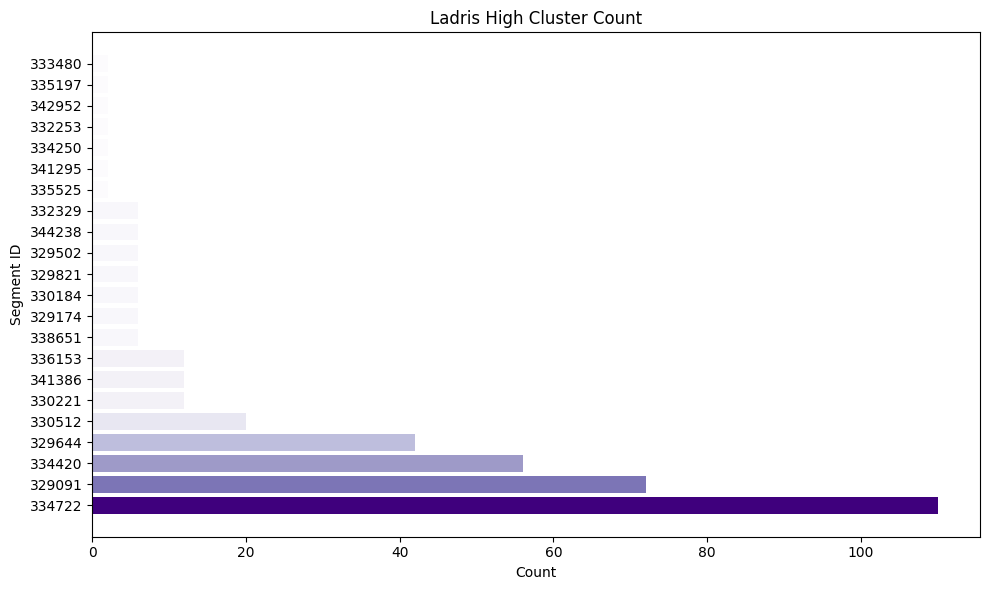

In [17]:
### generate heat map colors for each key value pair of ladris_hc_count_json based on the value with the highest count being red and the lowest count being blue based on the range of values
ladris_hc_count_json_sorted = dict(sorted(ladris_hc_count_json.items(), key=lambda item: item[1], reverse=True))
ladris_hc_count_json_sorted
ladris_hc_count_json_sorted_keys = list(ladris_hc_count_json_sorted.keys())
ladris_hc_count_json_sorted_values = list(ladris_hc_count_json_sorted.values())
ladris_hc_count_json_sorted_values_max = max(ladris_hc_count_json_sorted_values)
ladris_hc_count_json_sorted_values_min = min(ladris_hc_count_json_sorted_values)
ladris_hc_count_json_sorted_values_range = ladris_hc_count_json_sorted_values_max - ladris_hc_count_json_sorted_values_min
ladris_hc_count_json_sorted_values_normalized = [(x - ladris_hc_count_json_sorted_values_min) / ladris_hc_count_json_sorted_values_range for x in ladris_hc_count_json_sorted_values]
ladris_hc_count_json_sorted_values_normalized
ladris_hc_count_json_sorted_values_normalized_colors = []
for x in ladris_hc_count_json_sorted_values_normalized:
    ### color the values based on the normalized value with purple
    ladris_hc_count_json_sorted_values_normalized_colors.append(plt.cm.Purples(x))

    #if x < 0.5:
        #ladris_hc_count_json_sorted_values_normalized_colors.append(plt.cm.Blues(x))
    #else:
        #ladris_hc_count_json_sorted_values_normalized_colors.append(plt.cm.Reds(x))
ladris_hc_count_json_sorted_values_normalized_colors
### create a new dataframe with the keys and values of the sorted json and the corresponding color
ladris_hc_count_df = pd.DataFrame({'key': ladris_hc_count_json_sorted_keys, 'value': ladris_hc_count_json_sorted_values, 'color': ladris_hc_count_json_sorted_values_normalized_colors})
ladris_hc_count_df.head()
### plot the heat map of the sorted json
plt.figure(figsize=(10, 6))
plt.barh(ladris_hc_count_df['key'], ladris_hc_count_df['value'], color=ladris_hc_count_df['color'])
plt.xlabel('Count')
plt.ylabel('Segment ID')
plt.title('Ladris High Cluster Count')
plt.tight_layout()
plt.show()



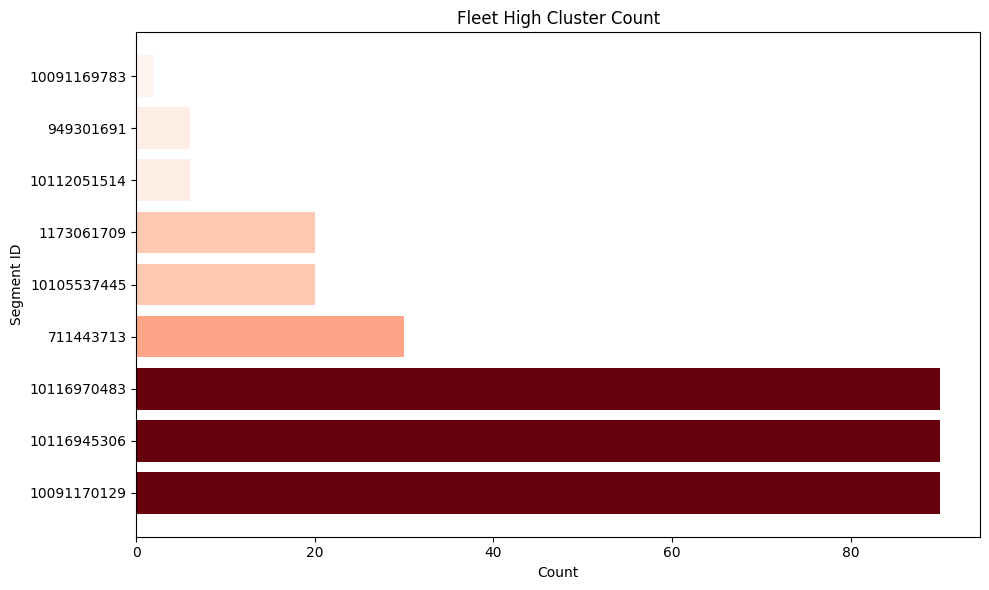

In [18]:
### generate heat map colors for each key value pair of fleet_hc_count_json based on the value with the highest count being green and the lowest count being yellow based on the range of values
fleet_hc_count_json_sorted = dict(sorted(fleet_hc_count_json.items(), key=lambda item: item[1], reverse=True))
fleet_hc_count_json_sorted
fleet_hc_count_json_sorted_keys = list(fleet_hc_count_json_sorted.keys())
fleet_hc_count_json_sorted_values = list(fleet_hc_count_json_sorted.values())
fleet_hc_count_json_sorted_values_max = max(fleet_hc_count_json_sorted_values)
fleet_hc_count_json_sorted_values_min = min(fleet_hc_count_json_sorted_values)
fleet_hc_count_json_sorted_values_range = fleet_hc_count_json_sorted_values_max - fleet_hc_count_json_sorted_values_min
fleet_hc_count_json_sorted_values_normalized = [(x - fleet_hc_count_json_sorted_values_min) / fleet_hc_count_json_sorted_values_range for x in fleet_hc_count_json_sorted_values]
fleet_hc_count_json_sorted_values_normalized
fleet_hc_count_json_sorted_values_normalized_colors = []
for x in fleet_hc_count_json_sorted_values_normalized:
    #if x < 0.5:
    #    fleet_hc_count_json_sorted_values_normalized_colors.append(plt.cm.Blues(x))
    #else:
    fleet_hc_count_json_sorted_values_normalized_colors.append(plt.cm.Reds(x))
fleet_hc_count_json_sorted_values_normalized_colors
### create a new dataframe with the keys and values of the sorted json and the corresponding color
fleet_hc_count_df = pd.DataFrame({'key': fleet_hc_count_json_sorted_keys, 'value': fleet_hc_count_json_sorted_values, 'color': fleet_hc_count_json_sorted_values_normalized_colors})
fleet_hc_count_df.head()
### plot the heat map of the sorted json
plt.figure(figsize=(10, 6))
plt.barh(fleet_hc_count_df['key'], fleet_hc_count_df['value'], color=fleet_hc_count_df['color'])
plt.xlabel('Count')
plt.ylabel('Segment ID')
plt.title('Fleet High Cluster Count')
plt.tight_layout()
plt.show()


In [19]:
ladris_hc_count_df

,key,value,color
0,334722,110,"(0.24705882352941178, 0.0, 0.49019607843137253..."
1,329091,72,"(0.4867358708189158, 0.45974625144175313, 0.71..."
2,334420,56,"(0.617762399077278, 0.6021376393694733, 0.7834..."
3,329644,42,"(0.7432525951557094, 0.7469742406766628, 0.865..."
4,330512,20,"(0.9110957324106113, 0.9057439446366782, 0.948..."
5,330221,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
6,341386,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
7,336153,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
8,338651,6,"(0.973840830449827, 0.9688119953863898, 0.9832..."
9,329174,6,"(0.973840830449827, 0.9688119953863898, 0.9832..."


In [20]:
ladris_df

,330221,334722,329174,344238,328156,336153,341386,342952,329091,329644,...,332329,338651,334250,335451,342669,341295,329502,341121,333480,343388
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,0,1,0,1,...,1,1,1,1,1,0,0,0,0,0
2,0,0,1,1,1,1,1,0,0,1,...,1,0,1,1,1,1,1,1,1,1
3,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,1,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,1,1,1,0,0,0,...,1,1,0,0,1,1,0,1,1,0
1996,1,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1997,1,1,1,0,1,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
### create a new dataframe ladris_df_334722 with all rows of ladris_df where column 334722 is 1
dataFrames = []
ladris_df_334722 = ladris_df[ladris_df[334722] == 1]
dataFrames.append(ladris_df_334722)

for i in ladris_hc_count_df['key'][:10]:
    dataFrames.append(ladris_df[ladris_df[int(i)] == 1])

print(len(dataFrames))



11


In [22]:
### caculate the sum of each column of ladris_df_334722
ladris_df_334722_sum = ladris_df_334722.sum(axis=0)

### print the sum of each column of ladris_df_334722 in descending order
ladris_df_334722_sum_sorted = ladris_df_334722_sum.sort_values(ascending=False)
ladris_df_334722_sum_sorted[1:]



343388    522
338651    517
332329    515
331775    512
335525    511
329091    509
330184    506
336153    505
341386    505
344238    504
335197    503
342952    502
333480    501
330512    500
328156    500
329502    498
341121    498
332253    497
329644    496
334250    493
335451    492
341295    492
330221    489
329174    487
342669    487
334420    486
329821    483
dtype: int64

In [103]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
freq_itemsets = []
for i in dataFrames:
    frequent_itemsets = fpgrowth(i, min_support=0.1, use_colnames=True)
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    freq_itemsets.append(frequent_itemsets)
len(freq_itemsets)

### 

11

In [104]:
freq_rules = []
for i in freq_itemsets:
    rules = association_rules(i, metric="confidence", min_threshold=0.7, support_only=False, num_itemsets=len(ladris_df_334722))
    freq_rules.append(rules)

len(freq_rules)

/home/pfoytik/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/pfoytik/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/pfoytik/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/pfoytik/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
/home/pfoytik/anaconda3/lib/python3.10/s

11

In [106]:
freq_rules[0].head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(343388),(334722),0.523046,1.0,0.523046,1.0,1.0,1.0,0.0,inf,0.0,0.523046,0.0,0.761523
1,(338651),(334722),0.518036,1.0,0.518036,1.0,1.0,1.0,0.0,inf,0.0,0.518036,0.0,0.759018
2,(332329),(334722),0.516032,1.0,0.516032,1.0,1.0,1.0,0.0,inf,0.0,0.516032,0.0,0.758016
3,(331775),(334722),0.513026,1.0,0.513026,1.0,1.0,1.0,0.0,inf,0.0,0.513026,0.0,0.756513
4,(335525),(334722),0.512024,1.0,0.512024,1.0,1.0,1.0,0.0,inf,0.0,0.512024,0.0,0.756012
5,(329091),(334722),0.510020,1.0,0.510020,1.0,1.0,1.0,0.0,inf,0.0,0.510020,0.0,0.755010
6,(330184),(334722),0.507014,1.0,0.507014,1.0,1.0,1.0,0.0,inf,0.0,0.507014,0.0,0.753507
7,(341386),(334722),0.506012,1.0,0.506012,1.0,1.0,1.0,0.0,inf,0.0,0.506012,0.0,0.753006
8,(336153),(334722),0.506012,1.0,0.506012,1.0,1.0,1.0,0.0,inf,0.0,0.506012,0.0,0.753006
9,(344238),(334722),0.505010,1.0,0.505010,1.0,1.0,1.0,0.0,inf,0.0,0.505010,0.0,0.752505


In [110]:
### add a column to rules that is the count of the antecedents
multi_freq_rules = []
for i in freq_rules:
    ### add a column to rules that is the count of the antecedents
    i['antecedent_count'] = i['antecedents'].apply(lambda x: len(x))
    ### print the rules with antecedent_count > 1 in descending order of support
    i = i[i['antecedent_count'] > 2].sort_values(by='support', ascending=False)
    multi_freq_rules.append(i)
len(multi_freq_rules)


11

In [111]:
### print rules with support >= 0.15
high_rules = []
for rules in multi_freq_rules:
    ### filter rules with support >= 0.15
    high_rules.append(rules[rules['support'] >= 0.15].sort_values(by='support', ascending=False))

len(high_rules)

11

In [124]:
high_rules[10]['antecedents']

378    (330512, 332253, 341295)
379    (342952, 341121, 342669)
380    (342952, 341121, 343388)
381    (341121, 334250, 330221)
382    (330221, 344238, 335525)
385    (342952, 341121, 335525)
386    (341121, 334250, 342669)
384    (341121, 334250, 335525)
383    (341386, 331775, 341295)
387    (342952, 332253, 341295)
388    (342952, 341121, 330221)
389    (330221, 341121, 342669)
390    (330512, 332253, 330184)
391    (332253, 335197, 341295)
392    (342952, 341121, 332253)
394    (331775, 329091, 341295)
393    (334250, 330221, 335525)
395    (332329, 338651, 329644)
396    (334250, 338651, 335525)
397    (342952, 343388, 332253)
398    (341121, 330221, 332329)
399    (334250, 334420, 330221)
405    (341121, 341386, 343388)
408    (342952, 332253, 342669)
407    (336153, 329091, 330221)
406    (341121, 338651, 335525)
404    (341121, 341386, 342669)
403    (342952, 330221, 332253)
402    (341121, 342669, 335525)
401    (341121, 330221, 335525)
400    (330512, 332253, 335197)
Name: an

In [131]:
unique_antecedents = []
for x in high_rules:
    for i in x['antecedents']:
        for j in i:
            #print(j)
            if j not in unique_antecedents:
                unique_antecedents.append(j)
print("Unique Antecedents:")
print(unique_antecedents)


Unique Antecedents:
[332329, 344238, 331775, 338651, 335525, 329091, 334420, 336153, 332253, 330184, 335451, 329644, 342952, 343388, 341295, 335197, 330221, 341386, 328156, 341121, 334722, 329821, 333480, 329174, 342669, 334250, 329502, 330512]


In [132]:
### combine all the high_rules into one dataframe
combined_high_rules = pd.DataFrame()
for i in high_rules:
    combined_high_rules = pd.concat([combined_high_rules, i], axis=0)
combined_high_rules = combined_high_rules.reset_index(drop=True)
print("Combined High Rules:")
print(combined_high_rules.head(20))

Combined High Rules:
                 antecedents consequents  antecedent support  \
0   (332329, 344238, 331775)    (334722)            0.157315   
1   (332329, 338651, 335525)    (334722)            0.157315   
2   (332329, 338651, 331775)    (334722)            0.156313   
3   (329091, 334420, 338651)    (334722)            0.156313   
4   (332329, 344238, 336153)    (334722)            0.156313   
5   (332329, 332253, 335525)    (334722)            0.155311   
6   (330184, 338651, 331775)    (334722)            0.155311   
7   (330184, 335451, 331775)    (334722)            0.155311   
8   (332329, 329644, 344238)    (334722)            0.154309   
9   (342952, 332329, 335525)    (334722)            0.154309   
10  (342952, 343388, 341295)    (334722)            0.154309   
11  (335451, 334420, 331775)    (334722)            0.154309   
12  (332329, 338651, 336153)    (334722)            0.154309   
13  (334420, 335197, 331775)    (334722)            0.154309   
14  (342952, 332329

In [139]:
uniqueCount = {}
full_highRules_list = list(combined_high_rules['antecedents'])
for fl in full_highRules_list:
    #print(list(fl))
    uniqueCount[tuple(fl)] = uniqueCount.get(tuple(fl), 0) + 1

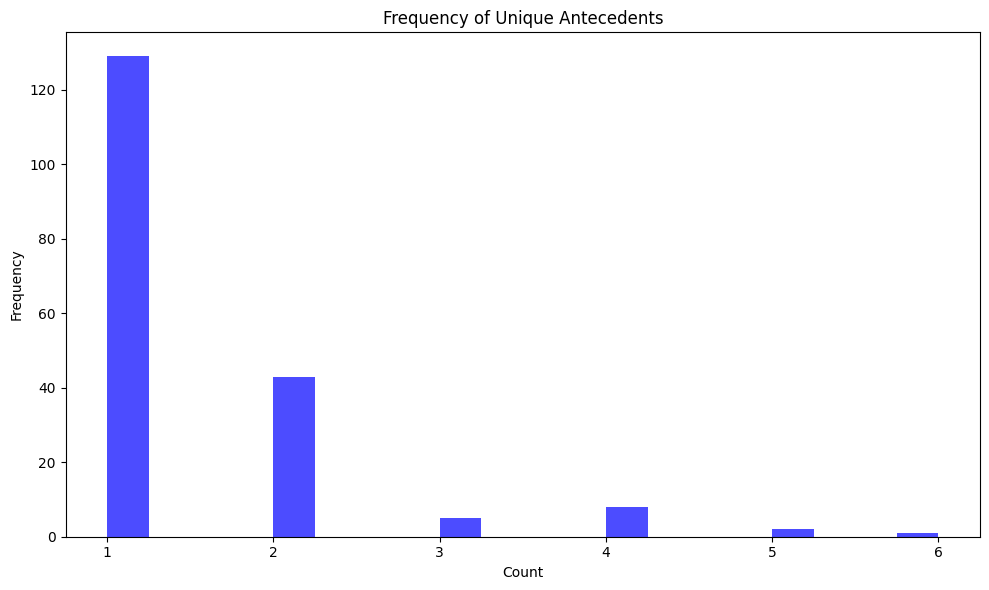

In [141]:
### plot values of uniqueCount as histogram
plt.figure(figsize=(10, 6))
plt.hist(list(uniqueCount.values()), bins=20, color='blue', alpha=0.7)
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Antecedents')
plt.tight_layout()
plt.show()

In [142]:
### sort uniqueCount by values in descending order
uniqueCount_sorted = dict(sorted(uniqueCount.items(), key=lambda item: item[1], reverse=True))
print("Unique Count Sorted:")
print(uniqueCount_sorted)

Unique Count Sorted:
{(332329, 329644, 344238): 6, (342952, 332329, 335525): 5, (342952, 332329, 343388): 5, (332329, 338651, 335525): 4, (332329, 338651, 331775): 4, (332329, 338651, 329644): 4, (342952, 329091, 343388): 4, (341121, 338651, 335525): 4, (332329, 338651, 334420): 4, (342952, 343388, 329821): 4, (342952, 341121, 335525): 4, (329091, 334420, 338651): 3, (332329, 344238, 336153): 3, (342952, 341121, 330221): 3, (332329, 334722, 338651): 3, (334250, 338651, 335525): 3, (332329, 344238, 331775): 2, (332329, 332253, 335525): 2, (330184, 338651, 331775): 2, (330184, 335451, 331775): 2, (342952, 343388, 341295): 2, (335451, 334420, 331775): 2, (332329, 338651, 336153): 2, (334420, 335197, 331775): 2, (338651, 330221, 331775): 2, (330184, 335197, 331775): 2, (330184, 334420, 331775): 2, (341386, 328156, 344238): 2, (342952, 332329, 329091): 2, (332329, 336153, 331775): 2, (330184, 332329, 338651): 2, (329091, 330221, 331775): 2, (338651, 329091, 330221): 2, (330184, 344238, 3317

In [338]:
ladris_df_subset.index

Index([   3,   15,   16,   20,   32,   33,   37,   39,   52,   61,
       ...
       1928, 1935, 1944, 1948, 1957, 1959, 1962, 1969, 1984, 1997],
      dtype='int64', length=250)

In [339]:
### measure jaccard index for each row of ladris_df_subset with each other row of ladris_df_subset and print the top 5 rows
jaccard_index = []
for i in range(len(ladris_df_subset)):
    for j in range(len(ladris_df_subset)):
        if i != j:
            intersection = np.logical_and(ladris_df_subset.iloc[i], ladris_df_subset.iloc[j])
            union = np.logical_or(ladris_df_subset.iloc[i], ladris_df_subset.iloc[j])
            jaccard_index.append([i, j, np.sum(intersection)/np.sum(union)])
jaccard_index = np.array(jaccard_index)
jaccard_index = jaccard_index[jaccard_index[:,2].argsort()[::-1]]
jaccard_index[:5]   



array([[ 24.        , 104.        ,   0.82352941],
       [104.        ,  24.        ,   0.82352941],
       [154.        , 225.        ,   0.81818182],
       [225.        , 154.        ,   0.81818182],
       [221.        , 198.        ,   0.80952381]])

In [340]:
len(jaccard_index)

62250

In [171]:
### get the index of the top 10 jaccard_index
top_10_index = np.argsort(jaccard_index)[-10:]
top_10_index

array([11849,  9218,  9346, 23767, 27795, 12957, 15623, 29821, 26635,
        5779])

In [181]:
### print ladris_df_subset rows with top 10 jaccard_index
for i in top_10_index:
    print(ladris_df_subset.iloc[i])

IndexError: single positional indexer is out-of-bounds

In [179]:
### print the top 10 index, jaccard index and the segments
for i in top_10_index:
    print("Index:", i)
    print("Jaccard Index:", jaccard_index[i])
    #### get index values of ladris_df_subset
    idxs = list(ladris_df_subset.index)

    ### get the index of i in idxs
    df_index = idxs.index(i)
    
    ### print the segments for index i of ladris_df_subset
    print("Segment:", ladris_df_subset.columns[ladris_df_subset.iloc[df_index] == 1].values)        
    print("\n\n")

Index: 11849
Jaccard Index: 0.7727272727272727


ValueError: 11849 is not in list

In [130]:
### print a list of the index values from ladris_df_subset
sub_indexs = ladris_df_subset.index.values

### print the ladris_df_results for the sub_indexs
ladris_df_results_subset = ladris_df_results.iloc[sub_indexs]
ladris_df_results_subset.head()

,0
3,4.652006
15,5.243494
16,5.682941
20,5.245733
32,5.239470


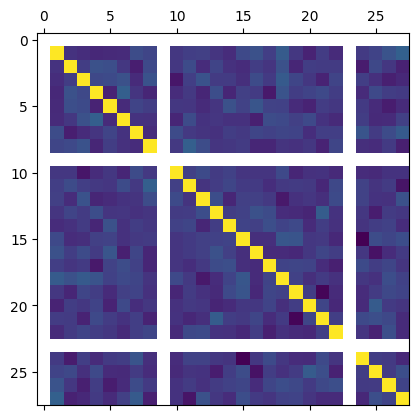

In [131]:
### plot a correlation matrix of the ladris_df_subset
corr = ladris_df_subset.corr()
plt.matshow(corr)
plt.show()


In [132]:
fleet_ids = list(fleet_df.columns)
ladris_ids = list(ladris_df.columns)

### Get Ladris Roads


In [133]:
ladris_segment_data = {}
roadFile = '../lhc_samples/data/ladris/C27F9DE4CE6780696685FB4A4E31E242_orig'
with open(roadFile, 'r') as f:
    ladris_segment_data = json.load(f)

ladris_latlong_dict = {}
ladris_potential_dict = {}
modified_dict = {}
ladris_names = {}

for i in ladris_segment_data:
    #print(i)
    ladris_latlong_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['geometry']
    lanes = i['num_lanes']
    speed = i['speed_mph']
    ladris_names[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = i['name']
    ladris_potential_dict[i['AC91D0B60F78BEFB85DE39CD9C3D2623']] = lanes * speed

In [134]:
### count how many ladris_ids are in ladris_latlong_dict.keys
ladris_count = 0
for i in ladris_ids:
    if i in ladris_latlong_dict.keys():
        ladris_count += 1
    else:
        pass

print("Ladris segments in ladris_latlong_dict:", ladris_count)



Ladris segments in ladris_latlong_dict: 28


In [304]:
ladris_hc_count_df

,key,value,color
0,334722,110,"(0.24705882352941178, 0.0, 0.49019607843137253..."
1,329091,72,"(0.4867358708189158, 0.45974625144175313, 0.71..."
2,334420,56,"(0.617762399077278, 0.6021376393694733, 0.7834..."
3,329644,42,"(0.7432525951557094, 0.7469742406766628, 0.865..."
4,330512,20,"(0.9110957324106113, 0.9057439446366782, 0.948..."
5,330221,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
6,341386,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
7,336153,12,"(0.951449442522107, 0.9446981930026913, 0.9695..."
8,338651,6,"(0.973840830449827, 0.9688119953863898, 0.9832..."
9,329174,6,"(0.973840830449827, 0.9688119953863898, 0.9832..."


In [305]:
### convert keys of ladris_latlong_dict to string
ladris_latlong_dict_str = {}
for k, v in ladris_latlong_dict.items():
    ladris_latlong_dict_str[str(k)] = v
    

In [306]:
ladris_latlong_dict_str

{'328121': <LINESTRING (-121.188 39.252, -121.188 39.252)>,
 '328122': <LINESTRING (-121.188 39.252, -121.188 39.252, -121.188 39.252, -121.188 39....>,
 '328123': <LINESTRING (-121.188 39.252, -121.188 39.252, -121.188 39.252, -121.188 39....>,
 '328124': <LINESTRING (-121.083 39.086, -121.083 39.086, -121.083 39.086, -121.083 39....>,
 '328125': <LINESTRING (-121.083 39.086, -121.083 39.086, -121.083 39.087, -121.082 39....>,
 '328126': <LINESTRING (-121.083 39.086, -121.084 39.086, -121.085 39.086, -121.085 39....>,
 '328127': <LINESTRING (-120.967 39.155, -120.967 39.157)>,
 '328128': <LINESTRING (-120.967 39.155, -120.967 39.154)>,
 '328129': <LINESTRING (-120.967 39.155, -120.963 39.155)>,
 '328130': <LINESTRING (-120.967 39.157, -120.967 39.155)>,
 '328131': <LINESTRING (-121.031 39.237, -121.031 39.237, -121.03 39.237, -121.029 39.2...>,
 '328132': <LINESTRING (-121.031 39.237, -121.031 39.237, -121.031 39.238, -121.031 39....>,
 '328133': <LINESTRING (-121.031 39.237, -121.031

In [307]:
### add the value of ladris_latlong_dict to the key of ladris_hc_count_df as a new field called geometry
ladris_hc_count_df['geometry'] = ladris_hc_count_df['key'].map(ladris_latlong_dict_str)

ladris_hc_count_df.head()

,key,value,color,geometry
0,334722,110,"(0.24705882352941178, 0.0, 0.49019607843137253...","LINESTRING (-121.045554 39.173818, -121.045541..."
1,329091,72,"(0.4867358708189158, 0.45974625144175313, 0.71...","LINESTRING (-121.1343037 39.15924, -121.134697..."
2,334420,56,"(0.617762399077278, 0.6021376393694733, 0.7834...","LINESTRING (-121.1323993 39.1644618, -121.1324..."
3,329644,42,"(0.7432525951557094, 0.7469742406766628, 0.865...","LINESTRING (-121.0366663 39.1617192, -121.0360..."
4,330512,20,"(0.9110957324106113, 0.9057439446366782, 0.948...","LINESTRING (-121.0384333 39.1528463, -121.0384..."


In [308]:
ladris_hc_count_df['color']

0     (0.24705882352941178, 0.0, 0.49019607843137253...
1     (0.4867358708189158, 0.45974625144175313, 0.71...
2     (0.617762399077278, 0.6021376393694733, 0.7834...
3     (0.7432525951557094, 0.7469742406766628, 0.865...
4     (0.9110957324106113, 0.9057439446366782, 0.948...
5     (0.951449442522107, 0.9446981930026913, 0.9695...
6     (0.951449442522107, 0.9446981930026913, 0.9695...
7     (0.951449442522107, 0.9446981930026913, 0.9695...
8     (0.973840830449827, 0.9688119953863898, 0.9832...
9     (0.973840830449827, 0.9688119953863898, 0.9832...
10    (0.973840830449827, 0.9688119953863898, 0.9832...
11    (0.973840830449827, 0.9688119953863898, 0.9832...
12    (0.973840830449827, 0.9688119953863898, 0.9832...
13    (0.973840830449827, 0.9688119953863898, 0.9832...
14    (0.973840830449827, 0.9688119953863898, 0.9832...
15    (0.9882352941176471, 0.984313725490196, 0.9921...
16    (0.9882352941176471, 0.984313725490196, 0.9921...
17    (0.9882352941176471, 0.984313725490196, 0.

In [309]:
ladris_hc_count_df['key'].values

array(['334722', '329091', '334420', '329644', '330512', '330221',
       '341386', '336153', '338651', '329174', '330184', '329821',
       '329502', '344238', '332329', '335525', '341295', '334250',
       '332253', '342952', '335197', '333480'], dtype=object)

In [310]:
ladris_latlong_dict_str.keys()

dict_keys(['328121', '328122', '328123', '328124', '328125', '328126', '328127', '328128', '328129', '328130', '328131', '328132', '328133', '328134', '328135', '328136', '328137', '328138', '328139', '328140', '328141', '328142', '328143', '328144', '328145', '328146', '328147', '328148', '328149', '328150', '328151', '328152', '328153', '328154', '328155', '328156', '328157', '328158', '328159', '328160', '328161', '328162', '328163', '328164', '328165', '328166', '328167', '328168', '328169', '328170', '328171', '328172', '328173', '328174', '328175', '328176', '328177', '328178', '328179', '328180', '328181', '328182', '328183', '328184', '328185', '328186', '328187', '328188', '328189', '328190', '328191', '328192', '328193', '328194', '328195', '328196', '328197', '328198', '328199', '328200', '328201', '328202', '328203', '328204', '328205', '328206', '328207', '328208', '328209', '328210', '328211', '328212', '328213', '328214', '328215', '328216', '328217', '328218', '328219',

In [311]:
### remove the rows from ladris_hc_count_df where the key is not in ladris_latlong_dict.keys()
ladris_hc_count_df = ladris_hc_count_df[ladris_hc_count_df['key'].isin(ladris_latlong_dict_str.keys())]
ladris_hc_count_df.head()
### remove the rows from ladris_hc_count_df where the value is 0
ladris_hc_count_df = ladris_hc_count_df[ladris_hc_count_df['value'] != 0]
ladris_hc_count_df.head()


,key,value,color,geometry
0,334722,110,"(0.24705882352941178, 0.0, 0.49019607843137253...","LINESTRING (-121.045554 39.173818, -121.045541..."
1,329091,72,"(0.4867358708189158, 0.45974625144175313, 0.71...","LINESTRING (-121.1343037 39.15924, -121.134697..."
2,334420,56,"(0.617762399077278, 0.6021376393694733, 0.7834...","LINESTRING (-121.1323993 39.1644618, -121.1324..."
3,329644,42,"(0.7432525951557094, 0.7469742406766628, 0.865...","LINESTRING (-121.0366663 39.1617192, -121.0360..."
4,330512,20,"(0.9110957324106113, 0.9057439446366782, 0.948...","LINESTRING (-121.0384333 39.1528463, -121.0384..."


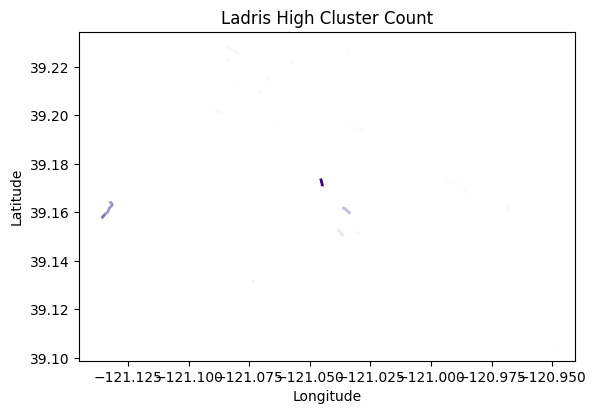

In [313]:
#### ladris_latlong_dict
new_ladris_latlong_dict = {}
for i in ladris_latlong_dict:    
    if i in ladris_ids:                
        #print(LineString(ladris_latlong_dict[i]))        
        new_ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])            
    ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])

### add id to the geometry of sub_gdf
for i in new_ladris_latlong_dict:
    new_ladris_latlong_dict[i] = LineString(ladris_latlong_dict[i])


all_gdf = GeoDataFrame(geometry=[ladris_latlong_dict[i] for i in ladris_latlong_dict])
#sub_gdf = GeoDataFrame(geometry=[new_ladris_latlong_dict[i] for i in new_ladris_latlong_dict])

#sub_gdf = GeoDataFrame(
#    {"id": list(new_ladris_latlong_dict.keys()), "geometry": list(new_ladris_latlong_dict.values())}
#)
sub_gdf = GeoDataFrame(
    {"id": ladris_hc_count_df['key'],
     "color": ladris_hc_count_df['color'],
     "geometry": ladris_hc_count_df['geometry']}
)


### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
#all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color=sub_gdf['color'], linewidth=2)
plt.title('Ladris High Cluster Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [314]:
sub_gdf.head()

,id,color,geometry
0,334722,"(0.24705882352941178, 0.0, 0.49019607843137253...","LINESTRING (-121.04555 39.17382, -121.04554 39..."
1,329091,"(0.4867358708189158, 0.45974625144175313, 0.71...","LINESTRING (-121.1343 39.15924, -121.1347 39.1..."
2,334420,"(0.617762399077278, 0.6021376393694733, 0.7834...","LINESTRING (-121.1324 39.16446, -121.1324 39.1..."
3,329644,"(0.7432525951557094, 0.7469742406766628, 0.865...","LINESTRING (-121.03667 39.16172, -121.03606 39..."
4,330512,"(0.9110957324106113, 0.9057439446366782, 0.948...","LINESTRING (-121.03843 39.15285, -121.03843 39..."


In [315]:
### export sub_gdf to kml
sub_gdf.to_file("ladris_sub_gdf.kml", driver="KML")

/home/pfoytik/anaconda3/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [316]:
sub_gdf.head()

,id,color,geometry
0,334722,"(0.24705882352941178, 0.0, 0.49019607843137253...","LINESTRING (-121.04555 39.17382, -121.04554 39..."
1,329091,"(0.4867358708189158, 0.45974625144175313, 0.71...","LINESTRING (-121.1343 39.15924, -121.1347 39.1..."
2,334420,"(0.617762399077278, 0.6021376393694733, 0.7834...","LINESTRING (-121.1324 39.16446, -121.1324 39.1..."
3,329644,"(0.7432525951557094, 0.7469742406766628, 0.865...","LINESTRING (-121.03667 39.16172, -121.03606 39..."
4,330512,"(0.9110957324106113, 0.9057439446366782, 0.948...","LINESTRING (-121.03843 39.15285, -121.03843 39..."


In [317]:
import ast

def rgb_to_kml_color(rgb_tuple):
    """Convert an (R, G, B, A) tuple to KML AABBGGRR format, ignoring alpha."""
    if isinstance(rgb_tuple, str):
        try:
            rgb_tuple = ast.literal_eval(rgb_tuple)  # Convert string to tuple
        except (SyntaxError, ValueError):
            print(f"Skipping invalid color value: {rgb_tuple}")
            return "ffffffff"  # Default to white if invalid

    if not (isinstance(rgb_tuple, (list, tuple)) and len(rgb_tuple) >= 3):
        print(f"Skipping invalid color value: {rgb_tuple}")
        return "ffffffff"

    # Ignore alpha (4th value) if present
    r, g, b = [round(255 * max(0, min(1, c))) for c in rgb_tuple[:3]]

    return f"ff{b:02x}{g:02x}{r:02x}"  # Convert to hex (BBGGRR) with full opacity (ff)


def create_kml_with_styles(gdf, output_kml):
    """Generate a KML file with colored LineStrings based on GeoDataFrame."""

    kml = """<?xml version="1.0" encoding="UTF-8"?>
    <kml xmlns="http://www.opengis.net/kml/2.2">
    <Document>
    """

    # Convert colors safely
    gdf["kml_color"] = gdf["color"].apply(rgb_to_kml_color)
    unique_colors = gdf[["id", "kml_color"]].drop_duplicates()

    # Define unique styles for each key
    for _, row in unique_colors.iterrows():
        kml += f"""
        <Style id="style-{row['id']}">
            <LineStyle>
                <color>{row['kml_color']}</color>
                <width>3</width>
            </LineStyle>
        </Style>
        """

    # Add LineStrings with correct styles
    for _, row in gdf.iterrows():
        coordinates = " ".join([f"{x},{y},0" for x, y in row.geometry.coords])
        kml += f"""
        <Placemark>
            <name>{row['id']}</name>
            <styleUrl>#style-{row['id']}</styleUrl>
            <LineString>
                <coordinates>{coordinates}</coordinates>
            </LineString>
        </Placemark>
        """

    kml += "\n</Document>\n</kml>"

    # Write to file
    with open(output_kml, "w") as file:
        file.write(kml)




In [318]:
# Convert and create KML file
create_kml_with_styles(sub_gdf, "corrected_ladris_sub_gdf.kml")

### Get Fleet Roads

In [137]:
### read segment id's from ../lhc_samples/data/fleet/segments.xml
tree = ET.parse('../lhc_samples/data/fleet/segments.xml')
root = tree.getroot()

fleet_segment_dict = {}
fleet_potential_dict = {}
for child in root:
    fleet_segment_dict[child.find('ID').text] = child.find('Link_ID').text
    lanes = int(child.find('Number_of_Lanes').text)
    speed = int(child.find('Freeflow_Speed').text)
    fleet_potential_dict[child.find('ID').text] = lanes * speed

### read ../lhcsamples/data/fleet/links.xml
tree = ET.parse('../lhc_samples/data/fleet/links.xml')
root = tree.getroot()

fleet_link_dict = {}
fleet_name_dict = {}
for child in root:
    fleet_link_dict[child.find('ID').text] = [child.find('ANode').text, child.find('BNode').text]    
    fleet_name_dict[child.find('ID').text] = child.find('Name').text

### read ../lhcsamples/data/fleet/nodes.xml and get lat long for BNode of each fleet_link_dict
tree = ET.parse('../lhc_samples/data/fleet/nodes.xml')
root = tree.getroot()

fleet_node_dict = {}
for child in root:
    fleet_node_dict[child.find('ID').text] = [child.find('Latitude').text, child.find('Longitude').text]

fleet_lat_long_dict = {}
### for each segment in fleet_segment_dict, get the link_id, from fleet_link_dict get the BNode, from fleet_node_dict get the lat long
for segment in fleet_segment_dict:
    link_id = fleet_segment_dict[segment]
    anode = fleet_link_dict[link_id][0]
    bnode = fleet_link_dict[link_id][1]
    lat_long = [fleet_node_dict[anode], fleet_node_dict[bnode]]
    fleet_lat_long_dict[int(segment)] = [[float(lat_long[0][1]), float(lat_long[0][0])],[float(lat_long[1][1]), float(lat_long[1][0])]]

In [138]:
### find value in fleet_lat_long_dict that is less than 39.05
bad_segments = []
for i in fleet_lat_long_dict:
    if fleet_lat_long_dict[i][0][1] < 39.1 or fleet_lat_long_dict[i][1][1] < 39.1:        
        print(i, fleet_lat_long_dict[i])
        ### remove from dictionary
        bad_segments.append(i)

for i in bad_segments:
    ### remove from fleet_lat_long_dict
    fleet_lat_long_dict.pop(i)

91170214 [[-121.06024, 39.0], [-121.05987, 39.2001]]
10091170214 [[-121.05987, 39.2001], [-121.06024, 39.0]]
116951100 [[-121.05605, 39.195], [-121.06024, 39.0]]
10116951100 [[-121.06024, 39.0], [-121.05605, 39.195]]
985378445 [[-121.06252, 39.1995], [-121.06024, 39.0]]
10985378445 [[-121.06024, 39.0], [-121.06252, 39.1995]]
985378446 [[-121.06024, 39.0], [-121.06085, 39.2007]]
10985378446 [[-121.06085, 39.2007], [-121.06024, 39.0]]


In [145]:
list(fleet_hc_count_df['key'])

['10091170129',
 '10116945306',
 '10116970483',
 '711443713',
 '10105537445',
 '1173061709',
 '10112051514',
 '949301691',
 '10091169783']

In [281]:
### count how many key's from fleet_hc_count_df are in fleet_lat_long_dict.keys()
fleet_count = 0
for i in fleet_hc_count_df['key']:
    if int(i) in fleet_lat_long_dict.keys():
        fleet_count += 1
    else:
        pass
print("Fleet segments in fleet_lat_long_dict:", fleet_count)

### convert keys of fleet_lat_long_dict to string
fleet_lat_long_dict_str = {}
for k, v in fleet_lat_long_dict.items():
    fleet_lat_long_dict_str[str(k)] = v
fleet_lat_long_dict_str
### add the value of fleet_lat_long_dict to the key of fleet_hc_count_df as a new field called geometry
fleet_hc_count_df['geometry'] = fleet_hc_count_df['key'].map(fleet_lat_long_dict_str)
fleet_hc_count_df.head()


Fleet segments in fleet_lat_long_dict: 9


,key,value,color,geometry
0,10091170129,90,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.06956 39.1459, -121.0712 39.1..."
1,10116945306,90,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.01225 39.2065, -121.01131 39...."
2,10116970483,90,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.12697 39.17, -121.13071 39.165)"
3,711443713,30,"(0.6915801614763553, 0.8227450980392157, 0.907...","LINESTRING (-121.04041 39.2066, -121.04339 39...."
4,10105537445,20,"(0.8111649365628605, 0.8819530949634755, 0.948...","LINESTRING (-121.07401 39.2082, -121.07488 39...."


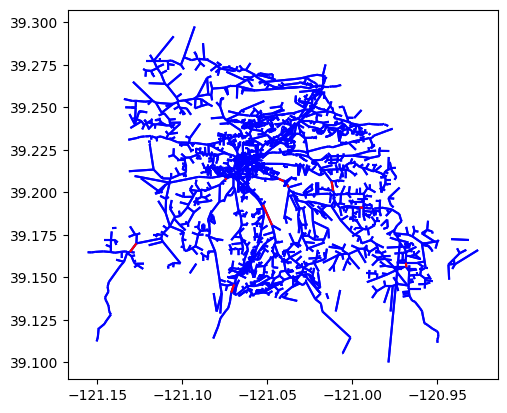

In [282]:
### for each fleet_lat_long_dict convert to float
new_fleet_lat_long_dict = {}
for i in fleet_lat_long_dict:
    if str(i) in fleet_ids:
        new_fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])
    fleet_lat_long_dict[i] = LineString(fleet_lat_long_dict[i])

all_gdf = GeoDataFrame(geometry=[fleet_lat_long_dict[i] for i in fleet_lat_long_dict])
#sub_gdf = GeoDataFrame(geometry=[new_fleet_lat_long_dict[i] for i in new_fleet_lat_long_dict])
sub_gdf = GeoDataFrame(
    {"id": fleet_hc_count_df['key'],
     "color": fleet_hc_count_df['color'],
     "geometry": fleet_hc_count_df['geometry']}
)

### plot all_gdf and sub_gdf on same plot
fig, ax = plt.subplots()
all_gdf.plot(ax=ax, color='blue')
sub_gdf.plot(ax=ax, color='red')

plt.show()

In [283]:
sub_gdf

,id,color,geometry
0,10091170129,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.06956 39.1459, -121.0712 39.1..."
1,10116945306,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.01225 39.2065, -121.01131 39...."
2,10116970483,"(0.403921568627451, 0.0, 0.05098039215686274, ...","LINESTRING (-121.12697 39.17, -121.13071 39.165)"
3,711443713,"(0.6915801614763553, 0.8227450980392157, 0.907...","LINESTRING (-121.04041 39.2066, -121.04339 39...."
4,10105537445,"(0.8111649365628605, 0.8819530949634755, 0.948...","LINESTRING (-121.07401 39.2082, -121.07488 39...."
5,1173061709,"(0.8111649365628605, 0.8819530949634755, 0.948...","LINESTRING (-121.04726 39.1807, -121.05259 39...."
6,10112051514,"(0.9347943098808151, 0.9626605151864667, 0.989...","LINESTRING (-121.0382 39.2044, -121.03742 39.2..."
7,949301691,"(0.9347943098808151, 0.9626605151864667, 0.989...","LINESTRING (-120.96828 39.1559, -120.96859 39...."
8,10091169783,"(0.9686274509803922, 0.984313725490196, 1.0, 1.0)","LINESTRING (-120.9958 39.1911, -120.99373 39.191)"


In [284]:
### export sub_gdf to kml
sub_gdf.to_file("fleet_sub_gdf.kml", driver="KML")

### convert fleet_hc_count_df to kml with styles
# Convert and create KML file
create_kml_with_styles(sub_gdf, "colored_fleet_sub_gdf.kml")


/home/pfoytik/anaconda3/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


![image](images/mainSegments_fleetBlue_LadrisPurple.png)

In [277]:
### export sub_gdf to kml
sub_gdf.to_file("colored_fleet_sub_gdf.kml", driver="KML")

/home/pfoytik/anaconda3/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [141]:
### print the first row of fleet_df
print(fleet_df.iloc[0].values)

[1 1 1 0 0 0 0 0 0 0]


In [142]:
print(fleet_df.iloc[1].values)

[0 0 1 1 1 1 0 0 0 0]


# Process and compare results

In [143]:
### fleet_df_results is in seconds and we need to convert it to hours
fleet_df_results = fleet_df_results/3600
fleet_df_results


,0
0,2.666667
1,3.583333
2,3.583333
3,3.583333
4,2.666667
...,...
1995,2.666667
1996,2.666667
1997,2.666667
1998,3.666667


In [144]:
### remove rows of ladris_df_results that have a value of 0
ladris_df_results = ladris_df_results[ladris_df_results != 0]
ladris_df_results = ladris_df_results.dropna()
ladris_df_results

,0
0,5.249842
1,3.879646
2,3.844590
3,4.652006
4,3.765344
...,...
1995,4.119792
1996,4.583354
1997,5.270471
1998,3.792136


In [145]:
### print summary statistics for fleet_df_results
fleet_df_results.describe()


,0
count,2000.000000
mean,3.195292
std,0.803599
min,2.666667
25%,2.666667
50%,2.666667
75%,3.583333
max,5.500000


In [146]:
### print summary statistics of ladris_df_results
ladris_df_results.describe()

,0
count,2000.000000
mean,4.457039
std,1.041844
min,3.624039
25%,3.779961
50%,4.120497
75%,4.910395
max,9.736981


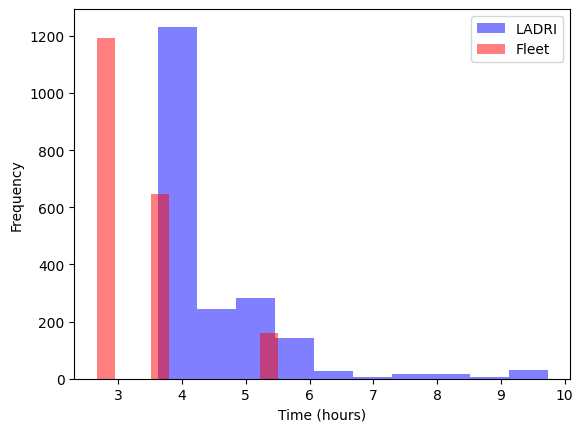

In [147]:
### plot histogram of fleet results and ladris results in the same figure
fig, ax = plt.subplots()
ladris_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='blue')
fleet_df_results.plot.hist(ax=ax, bins=10, alpha=0.5, color='red')
### add a legend where the labels are 'LADRI' and 'Fleet'
plt.legend(['LADRI', 'Fleet'])
### add label to x axis 'Time (hours)'
plt.xlabel('Time (hours)')

plt.show()